# Driver Drowsiness Detection System using MRL Dataset


# Introduction-:
The Drowsiness Detection System is a comprehensive solution designed to address the critical issue of drowsiness-related accidents, particularly in scenarios where individuals are engaged in activities that demand sustained attention. This system utilizes a sophisticated blend of computer vision and machine learning techniques to assess and monitor the state of a person's eyes in real-time.

# Purpose-:
The primary objective of the Drowsiness Detection System is to enhance safety by providing timely alerts when signs of drowsiness or closed eyes are detected. Leveraging the power of deep learning, the system is capable of discerning between open and closed eyes, making it a valuable tool for applications such as driver monitoring, workplace safety, and other contexts where sustained attention is crucial.

# About Dataset-:
Here is the link of Datast-https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset 
The Drowsiness Detection Dataset is generated using MRL and Closed Eyes in Wild(CEW) dataset, as well as our own unique dataset. This large-scale dataset comprising of both closed and open human eye images can be majorly used for eye detection and further be extended for drowsiness detection.There are various versions of this dataset.2,000 images of closed eyes and 2,000 images of open eyes make up the 4th version of the dataset i.e. Version 4 with 4k images in total.

# Prerequisites:
Ensure that the following libraries are installed before running the code:

Python (3.x recommended),
TensorFlow,
OpenCV,
Matplotlib,
NumPy,
winsound.

# Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Loading and displaying a sample image for demonstration

In [2]:
img_array = cv2.imread(r"D:\Assignments\Cloudyml projects\Internship Projects\Project 2\archive\train\Closed_Eyes\s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)


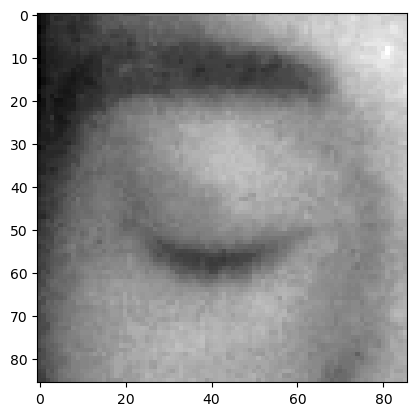

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape


(86, 86)

# Set the data directory and define classes for training data

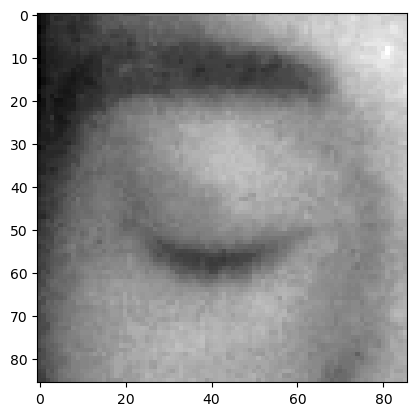

In [5]:
# Iterate through classes and display the first image
datadirectory = r"D:\Assignments\Cloudyml projects\Internship Projects\Project 2\archive\train"
Classes = ["Closed_Eyes", "Open_Eyes"]

for category in Classes:
    path = os.path.join(datadirectory, category)  # Use 'category' instead of 'Classes'
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    
    break


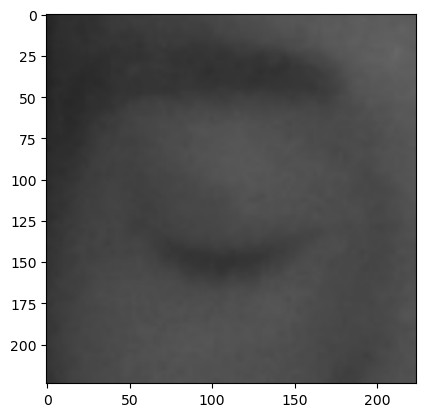

In [6]:
# Resize and display the first image
img_size=224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

# Creating a function to create training data by iterating through each class and processing images.

In [7]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
# Call the function to create the training data
create_training_data()

In [9]:
# Now, the 'training_data' list contains image arrays and corresponding labels
print(len(training_data))

4000


In [10]:
# Shuffle the data
np.random.shuffle(training_data)

In [11]:
# Separate data and labels
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
# Reshaping
X = np.array(X).reshape(-1, img_size, img_size,3)



In [12]:
X.shape

(4000, 224, 224, 3)

In [13]:
# Normalize the pixel values to be between 0 and 1
X = X / 255.0

In [14]:
# Convert to NumPy arrays
y = np.array(y)

In [15]:
#Saveing the preprocessed data using Pickle.
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump=(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump=(y, pickle_out)
pickle_out.close()

In [ ]:
# Load the preprocessed data using Pickle.
pickle_in=open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_out=open("y.pickle","rb")
y= pickle.load(pickle_in)

# Creating and training the Drowsiness Detection model using transfer learning with MobileNet


In [16]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers


In [17]:
#Create a MobileNet model for transfer learning
model=tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

TRANSFER LEARNING

In [19]:
base_input=model.layers[0].input

In [20]:
base_output=model.layers[-4].output

In [21]:
flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer)
final_output=layers.Activation("sigmoid")(final_output)

In [22]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

SETTINGS FOR BINARY CLASSIFICATION FOR OPEN EYE/CLOSED EYE

In [24]:
new_model.compile(loss="binary_crossentropy" ,optimizer="adam" ,metrics=["Accuracy"])

In [25]:
new_model.fit(X,y ,epochs=1,validation_split=0.1)



113/113 [==============================] - 497s 4s/step - loss: 0.0230 - Accuracy: 0.9906 - val_loss: 13.5412 - val_Accuracy: 0.5600


In [26]:
new_model.save("my_model.h5")

C:\Users\granj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
new_model=tf.keras.models.load_model("my_model.h5")

# Model Evaluation

In [28]:
#Checking current location
import os

# Print current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\granj


In [29]:
#I have already saved the given file in the current location.
img_array = cv2.imread("s0001_02336_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [30]:
X_input = np.array(new_array).reshape(1, img_size, img_size,3)

In [31]:
X_input.shape

(1, 224, 224, 3)

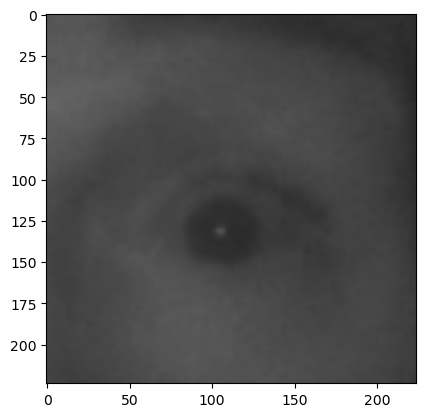

In [32]:
plt.imshow(new_array)

In [33]:
# Normalize the pixel values to be between 0 and 1
X_input = X_input / 255.0

In [34]:
#model prediction
prediction=new_model.predict(X_input)

1/1 [==============================] - 1s 1s/step


In [35]:
prediction

#The model's predictions are showing values close to 0 for closed eyes and values close to 1 for open eyes

array([[5.6412848e-08]], dtype=float32)

# CHECKING MODEL ON NEW IMAGE

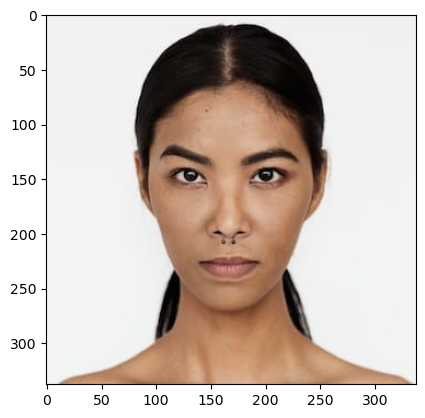

In [36]:
img = cv2.imread("high_res.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
facecascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface.xml")

In [38]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [39]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [40]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [41]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


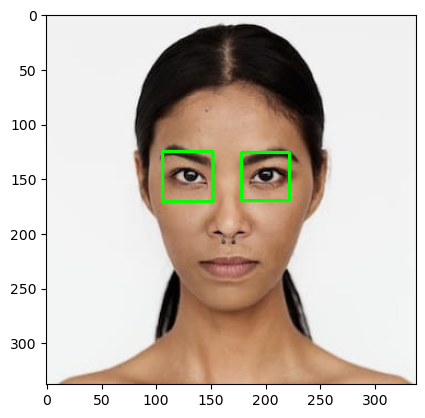

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

CROPPING THE EYE

In [43]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_gray=gray[y:y+h , x:x+w]
    roi_color=img[y:y+h , x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey : ey+eh, ex :ex+ew]
    
    

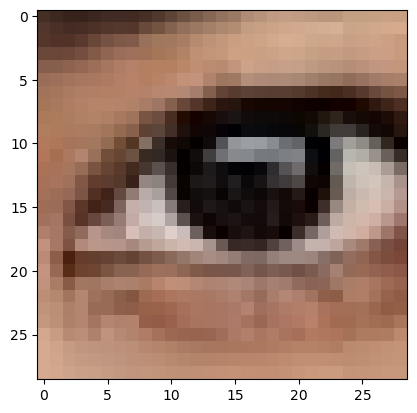

In [44]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [45]:
eyes_roi.shape

(29, 29, 3)

In [46]:
final_img = cv2.resize(eyes_roi, (224, 224))
final_img=np.expand_dims(final_img, axis=0)
final_img = final_img / 255.0

In [47]:
final_img.shape

(1, 224, 224, 3)

In [48]:
new_model.predict(final_img)

1/1 [==============================] - 0s 92ms/step


array([[2.2326588e-28]], dtype=float32)

# CREATING A REAL TIME DROWSINESS DETECTION ALERT SYSTEM


In [49]:
#new code
import cv2
import winsound
import numpy as np

frequency = 2500
duration = 1000


face_cascade = cv2.CascadeClassifier(r"C:\Users\granj\anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) == 0:
            print("Eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyes:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                final_img = cv2.resize(eyes_roi, (224, 224))
                final_img = np.expand_dims(final_img, axis=0)
                final_img = final_img / 255.0

                predictions = new_model.predict(final_img)

                # Assuming 'predictions' is a probability value between 0 and 1
                if predictions > 0.5:  # You can adjust the threshold as needed
                    status = "OPEN EYES"
                    cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_4)
                    x1, y1, w1, h1 = 0, 0, 175, 75

                    # Draw black background rectangle
                    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)

                    # Add text
                    cv2.putText(frame, "Active", (x1 + int(w1 / 10), y1 + int(h1 / 2)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                else:
                    counter += 1
                    status = "CLOSED EYES"
                    cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_4)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

                    if counter > 5:
                        x1, y1, w1, h1 = 0, 0, 175, 75

                        # Draw black background rectangle
                        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)

                        # Add text
                        cv2.putText(frame, "SLEEP ALERT !!!", (x1 + int(w1 / 10), y1 + int(h1 / 2)),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                        winsound.Beep(frequency, duration)
                        counter = 0

    cv2.imshow("Drowsiness detection system", frame)

    if cv2.waitKey(2) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not d

# Conclusion-:
The code implements a Drowsiness Detection System using transfer learning with a pre-trained MobileNet model. It processes real-time webcam feed, detects closed eyes, and triggers an alert when necessary. Ensure that required libraries are installed and paths are correctly specified before running the code.